# Pandas intro

In [1]:
import pandas as pd

In [5]:
import requests

In [7]:
url = "https://arctraining.github.io/python-2021-04/data/portal-teachingdb-master.zip"

req = requests.get(url, allow_redirects=True)

with open("data.zip","wb") as file:
    file.write(req.content)

## Open File

In [2]:
file_path = "data/portal-teachingdb-master/surveys.csv"

In [3]:
surveys_df = pd.read_csv(file_path)

In [4]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


## Exploring data

In [5]:
type(surveys_df)

pandas.core.frame.DataFrame

In [6]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [7]:
surveys_df.head(6)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN


In [28]:
surveys_df.tail(1)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [10]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [32]:
surveys_df.shape

(35549, 9)

In [33]:
surveys_df['month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [11]:
surveys_df.nunique()

record_id          35549
month                 12
day                   31
year                  26
plot_id               24
species_id            48
sex                    2
hindfoot_length       56
weight               255
dtype: int64

In [12]:
surveys_df["day"].describe()

count    35549.000000
mean        15.991195
std          8.257366
min          1.000000
25%          9.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64

In [20]:
surveys_df["day"].quantile(0.75)

23.0

In [22]:
surveys_df.describe().T

,count,mean,std,min,25%,50%,75%,max
record_id,35549.0,17775.000000,10262.256696,1.0,8888.0,17775.0,26662.0,35549.0
month,35549.0,6.477847,3.396925,1.0,4.0,6.0,10.0,12.0
day,35549.0,15.991195,8.257366,1.0,9.0,16.0,23.0,31.0
year,35549.0,1990.475231,7.493355,1977.0,1984.0,1990.0,1997.0,2002.0
plot_id,35549.0,11.397001,6.799406,1.0,5.0,11.0,17.0,24.0
hindfoot_length,31438.0,29.287932,9.564759,2.0,21.0,32.0,36.0,70.0
weight,32283.0,42.672428,36.631259,4.0,20.0,37.0,48.0,280.0


In [23]:
surveys_df["weight"].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [24]:
grouped_sex = surveys_df.groupby("sex")

In [26]:
grouped_sex["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15303.0,42.170555,36.847958,4.0,20.0,34.0,46.0,274.0
M,16879.0,42.995379,36.184981,4.0,20.0,39.0,49.0,280.0


In [28]:
grouped_sex.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [29]:
grouped_sex_sp = surveys_df.groupby(["species_id", "sex"])

In [30]:
grouped_sex_sp["weight"].describe()

count        mean        std    min     25%    50%     75%  \
species_id sex                                                                
AH         M       0.0         NaN        NaN    NaN     NaN    NaN     NaN   
BA         F      31.0    9.161290   2.237510    6.0    8.00    9.0   10.00   
           M      14.0    7.357143   0.841897    6.0    7.00    7.0    8.00   
DM         F    4440.0   41.609685   6.744468   10.0   38.00   42.0   46.00   
           M    5808.0   44.353134   6.642339   13.0   41.00   45.0   49.00   
DO         F    1280.0   48.531250   8.244255   12.0   44.00   49.0   54.00   
           M    1621.0   49.135102   7.649716   18.0   46.00   51.0   54.00   
DS         F    1106.0  117.749548  21.482427   45.0  108.00  120.0  130.00   
           M    1220.0  122.290984  23.983959   12.0  109.75  128.0  138.00   
NL         F     652.0  154.282209  39.186546   32.0  131.00  160.0  183.25   
           M     484.0  165.652893  48.991563   30.0  130.75  170.0  203.00   
OL         F     471.0   31.065817   6.780912   10.0   27.00   31.0   35.00   
           M     497.0   32.068410   6.893732   11.0   28.00   33.0   37.00   
OT         F    1029.0   24.830904   4.908162    5.0   22.00   25.0   27.00   
           M    1126.0   23.695382   3.990268    9.0   22.00   24.0   26.00   
OX         F       2.0   21.000000   1.414214   20.0   20.50   21.0   21.50   
           M       4.0   21.000000   2.581989   18.0   19.50   21.0   22.50   
PB         F    1617.0   30.210884   5.269065   12.0   27.00   30.0   33.00   
           M    1188.0   33.816498   8.269166   13.0   28.00   34.0   40.00   
PE         F     568.0   22.822183   4.569093   11.0   20.00   23.0   25.00   
           M     689.0   20.584906   3.485285    8.0   19.00   21.0   23.00   
PF         F     742.0    7.974394   1.686060    4.0    7.00    8.0    9.00   
           M     802.0    7.885287   1.587815    4.0    7.00    8.0    9.00   
PH         F      20.0   30.850000   5.806303   18.0   29.00   31.5   33.25   
           M      11.0   31.454545   6.846366   18.0   29.50   33.0   34.00   
PI         M       7.0   19.428571   1.511858   17.0   18.50   20.0   20.50   
PL         F      16.0   19.312500   4.908751    8.0   17.50   20.5   22.00   
           M      19.0   18.684211   3.334210   10.0   16.50   20.0   21.00   
PM         F     374.0   22.125668   5.188432    8.0   19.00   22.0   25.00   
           M     498.0   20.801205   4.489944    7.0   19.00   21.0   24.00   
PP         F    1583.0   17.180670   3.793194    5.0   15.00   17.0   19.00   
           M    1431.0   17.184486   3.527246    4.0   15.00   17.0   20.00   
PX         F       1.0   20.000000        NaN   20.0   20.00   20.0   20.00   
           M       1.0   18.000000        NaN   18.0   18.00   18.0   18.00   
RF         F      57.0   13.684211   2.384158    9.0   12.00   13.0   16.00   
           M      18.0   12.444444   1.149026   11.0   12.00   12.0   13.00   
RM         F    1184.0   11.102196   2.558303    4.0    9.00   11.0   13.00   
           M    1339.0   10.123226   1.728740    4.0    9.00   10.0   11.00   
RO         F       4.0   11.000000   2.160247    8.0   10.25   11.5   12.25   
           M       4.0    9.500000   1.290994    8.0    8.75    9.5   10.25   
RX         M       2.0   15.500000   6.363961   11.0   13.25   15.5   17.75   
SF         F      16.0   69.000000  37.778301   46.0   48.50   52.5   81.25   
           M      23.0   53.434783  17.130054   24.0   46.00   50.0   59.00   
SH         F      78.0   78.756410  25.053287   30.0   60.00   76.0   98.00   
           M      62.0   65.177419  21.273800   16.0   50.25   66.5   80.75   
SO         F      31.0   55.322581  23.698646   15.0   39.00   48.0   77.50   
           M      10.0   55.700000  16.526410   35.0   45.25   51.5   65.50   
SS         F       1.0   57.000000        NaN   57.0   57.00   57.0   57.00   
           M       1.0  130.000000        NaN  130.0  130.00  130.0

In [31]:
grouped_sex_sp["record_id"].count()["SS"]

sex
F    1
M    2
Name: record_id, dtype: int64

## Math operation

In [34]:
surveys_df["weight"].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [39]:
surveys_df["weight2"] = surveys_df["weight"]*2

In [40]:
surveys_df["weight2"].describe()

count    32283.000000
mean       170.689713
std        146.525038
min         16.000000
25%         80.000000
50%        148.000000
75%        192.000000
max       1120.000000
Name: weight2, dtype: float64

In [41]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight2
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


In [42]:
surveys_df["Me"] = "Patricia"

In [48]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight2
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


In [47]:
surveys_df = surveys_df.drop("Me", axis=1)

In [49]:
surveys_df.shape

(35549, 10)

In [55]:
import numpy as np

In [53]:
surveys_df["You"] = ""

In [56]:
surveys_df["You2"] = np.nan

In [58]:
surveys_df["You3"] = -9999

In [59]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight2,You,You2,You3
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN,,NaN,-9999
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN,,NaN,-9999
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN,,NaN,-9999
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN,,NaN,-9999
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN,,NaN,-9999


## Plot

In [60]:
species_counts = surveys_df.groupby("species_id")["record_id"].count()

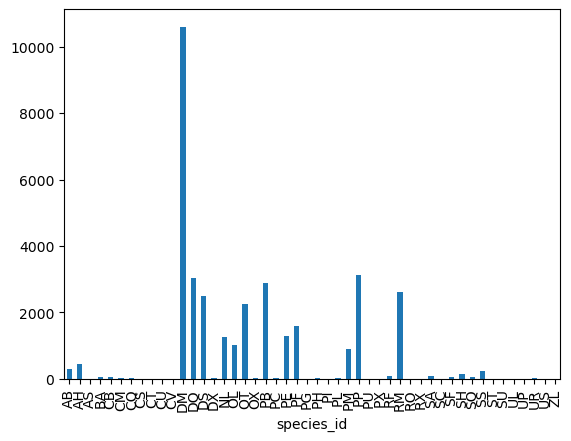

In [65]:
sp_count_plot = species_counts.plot(kind="bar").get_figure()

In [66]:
sp_count_plot.savefig("plot.png")